# Project: No-show Medical Appointments (Brazil)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


> <font size = "4">*This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.*</font>

- **PatientID**: The ID of a patient.


- **AppointmentID**: The appointment ID of a patient.


- **Gender**: The gender of each patient (male/female).


- **ScheduledDay**: The day of the actual appointment, when they have to visit the doctor.


- **AppointmentDay**: The day someone called or registered the appointment, this is before appointment of course.


- **Age**: How old is the patient.


- **Neighbourhood**: Where the appointment takes place.


- **Scholarship**: Indicates whether or not the patient is enrolled in Brasilian welfare program [Bolsa Família](https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia).


- **Hipertension**: Indicates whether or not the patient suffers from Hipertension.


- **Diabetes**: Indicates whether or not the patient suffers from Diabetes.


- **Alcoholism**: Indicates whether or not the patient suffers from Alcoholism.


- **Handcap**: The number of handcaps that the patient has.


- **SMS_received**: Indicates whether or not the patient recieved a SMS message.


- **No-show**: Indicates whether or not the patient showed up in the appointment.


## Question(s) for Analysis:
- <font size = "3">What is the percentage of patients who didn't show at their appointments?</font>


- <font size = "3">What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?</font>


- <font size = "3">Is gender associated with No-show?</font>


- <font size = "3">Is scholarship associated with No-show?</font>


- <font size = "3">Is hipertension associated with No-show?</font>


- <font size ="3">Is diabetes associated with No-show?</font>


- <font size ="3">Is alcoholism associated with No-show?</font>


- <font size ="3">Is SMS-recieved associated with No-show?</font>


- <font size ="3">Is age associated with No-show?</font>

<font size="3">Importing libraries.</font>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'
   ITALIC = '\x1B[3m'

<a id='wrangling'></a>
## Data Wrangling

### Gathering Data

<font size="3">Reading the data file from a `csv` file.</font>

In [2]:
data = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

### Assessing Data

<font size="3">Printing 10 rows of the dataset.</font>

In [3]:
data.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


<font size="3">Renaming `PatientId` column to `PatientID`.</font>

In [4]:
data.rename(columns = {'PatientId':'PatientID'}, inplace = True)

<font size = "3">Renaming `No-show` column to `No_show`.</font>

In [5]:
data.rename(columns = {'No-show':'No_show'}, inplace = True)

<font size = "3">Let's check for null values.</font>

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientID       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No_show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


<font size = "3">**No null values had been found.**</font>

<font size = "3">Checking for duplicates.</font>

In [7]:
sum(data.duplicated())

0

<font size = "3">**Great! No duplicates had been found.**</font>

<font size = "3">Checking the ranges of the data.</font>

In [8]:
data.describe()

,PatientID,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


<font size = "3">There is a ***-1*** in the *minimum* record of `Age` column, let's check in how many rows is this error present.</font>

In [9]:
data[data['Age'] == -1]

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


<font size = "3">**It is present in only one row.**</font>

<font size = "3">Checking the count of ***males*** versus ***females***, because it wasn't shown in the `.describe()` above.</font>

In [10]:
data['Gender'].value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

<font size = "3">Also checking the count of ***show*** versus ***no_show***, because it wasn't shown in the `.describe()` above.</font>

In [11]:
data['No_show'].value_counts()

No     88208
Yes    22319
Name: No_show, dtype: int64

<font size = "3">The `Gender` and `No_show` seem to have no problems.</font>

<font size = "3">**Assessing Issues**</font>


- `PatientID` has datatype of ***float64*** which isn't displayed correctly.
- `ScheduledDay` has datatype of ***object*** which kind of messy.
- `AppointmentDay` data has all *times* set to *00:00:00*, and it's datatype is ***object***.
- There is only one row ***(99832)*** which contains ***-1*** value for the age.

### Data Cleaning

<font size = "3">**Define**</font>

- Convert `PatientID` datatype to ***int64*** using `astype`.
- Convert `ScheduledDay` datatype to ***datetime64*** using`astype`.
- Remove all the unnecessary times (*00:00:00*) in `AppointmentDay`, then change it's datatype to ***datetime64*** using `astype`.
- Remove the ***(99832)*** row which contains ***-1*** in `Age` column.

<font size = "3">Making a copy from the original dataframe.</font>

In [12]:
data_clean = data.copy()

In [13]:
# Converting the PatientID datatype from float64 to int64
data_clean['PatientID'] = data_clean.astype({'PatientID' : np.int64})

In [14]:
# Converting the ScheduledDay datatype from object to datetime64
data_clean['ScheduledDay'] = data_clean['ScheduledDay'].astype('datetime64[ns]')

<font size = "3">Testing that the datatypes of those 2 columns are changed successfully.</font>

In [15]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientID       110527 non-null  object        
 1   AppointmentID   110527 non-null  int64         
 2   Gender          110527 non-null  object        
 3   ScheduledDay    110527 non-null  datetime64[ns]
 4   AppointmentDay  110527 non-null  object        
 5   Age             110527 non-null  int64         
 6   Neighbourhood   110527 non-null  object        
 7   Scholarship     110527 non-null  int64         
 8   Hipertension    110527 non-null  int64         
 9   Diabetes        110527 non-null  int64         
 10  Alcoholism      110527 non-null  int64         
 11  Handcap         110527 non-null  int64         
 12  SMS_received    110527 non-null  int64         
 13  No_show         110527 non-null  object        
dtypes: datetime64[ns](1), int64(8), obje

In [16]:
data_clean.head()

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29 16:08:27,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29 16:19:04,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29 17:29:31,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29 16:07:23,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [17]:
# Converting the AppointmentDay datatype from object to datetime64
data_clean['AppointmentDay'] = data_clean['AppointmentDay'].astype('datetime64[ns]')

<font size = "3">Testing that the datatype of `AppointmentID` column and the zeros in the time are changed successfully.</font>

In [18]:
data_clean.head()

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [19]:
# Dropping the row that contains the -1 in the Age column
data_clean.drop(index = data_clean[data_clean['Age'] == -1].index, inplace = True)

<font size = "3">Testing that the ***-1*** in the `Age` column is removed successfully.</font>

In [20]:
data_clean.describe()

,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


<font size = "3">Returning the cleaned data to the original dataset.</font>

In [21]:
data = data_clean

In [22]:
data.head()

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis

### What is the percentage of patients who didn't show at their appointments?

<font size = "3">Creating masks for patients who had shown at their appointments and who hadn't.</font>

In [23]:
show = data.query('No_show == "No"')
no_show = data.query('No_show == "Yes"')

In [24]:
# Getting the percentage of the patients that didn't show at their appointments.
no_show_proportion = (sum(no_show.value_counts()) / sum(data['No_show'].value_counts())) * 100

# Used the {:.2f} to round the result to two decimal places.
no_show_proportion = "{:.2f}".format(no_show_proportion)
print("The percentage of the patients that didn't show at their appointments is: " + color.BOLD + color.GREEN + "{}%".format(no_show_proportion))

The percentage of the patients that didn't show at their appointments is: 20.19%


In [25]:
# Getting the percentage of the patients that shown at their appointments.
show_proportion = (sum(show.value_counts()) / sum(data['No_show'].value_counts())) * 100

# Used the {:.2f} to round the result to two decimal places.
show_proportion = "{:.2f}".format(show_proportion)
print("The percentage of the patients that shown at their appointments is: " + color.BOLD + color.GREEN + "{}%".format(show_proportion))

The percentage of the patients that shown at their appointments is: 79.81%


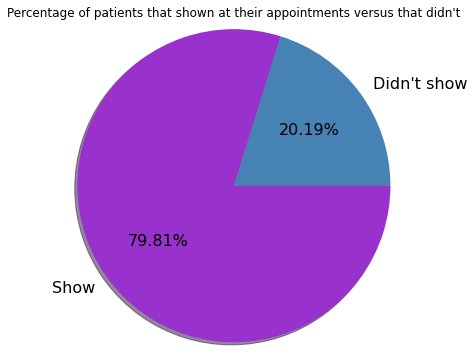

In [26]:
# Drawing a pie chart
myvalues = [no_show_proportion, show_proportion]
mylabels = ["Didn't show", "Show"]
mycolors = ["steelblue", "darkorchid"]
plt.subplots(figsize=(6, 6))
plt.pie(myvalues, labels = mylabels, shadow = True, colors = mycolors, radius = 1.2, autopct='%1.2f%%', textprops={'fontsize': 16})
plt.title("Percentage of patients that shown at their appointments versus that didn't")
plt.show()

<font size = "3">*The majority of people had shown up at their appointments.*</font>

### What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

In [27]:
# Factors:
#   Age
#   Gender
#   Scholarship
#   Hipertension
#   Diabetes
#   Alcoholism
#   SMS_recieved

In [28]:
def bar(column):
    """
    Visualize the selected column with the show & no-show at the appointments.
    INPUT:
    column: column name in the dataset.
    """
    # Using groupby to group the column with the show|no_show feature.
    col = data.groupby(column)['No_show'].value_counts(normalize = True).reset_index(column)
    x = ["Show", "No-show"]
    first = [col.iloc[0][1], col.iloc[1][1]]
    second = [col.iloc[2][1], col.iloc[3][1]]
    
    # Printing the relation between the column observations with the show|no_show feature.
    print(data.groupby(column)['No_show'].value_counts(normalize = True).unstack(column))
    
    width = 0.3
    bar1 = np.arange(len(x))
    bar2 = [i+width for i in bar1]
    
    # Drawing the bar chart
    
    plt.subplots(figsize = (8, 8))
    bars = plt.bar(bar1, first, width, label = col.iloc[0][0], color = "steelblue", edgecolor = "black")
    plt.bar(bar2, second, width, label = col.iloc[2][0], color = "darkorchid", edgecolor = "black")
    plt.title('{} associated with showing percentage'.format(column), fontsize = 18)
    plt.xlabel('No-Show', fontsize = 16, weight = "bold")
    plt.ylabel('Percentage', fontsize = 16, weight = "bold")
    plt.xticks(bar1 + width/2, x)
    if column == 'Gender':
        plt.legend()
    else:
        plt.legend(['0', '1'])
        
    # For printing the bar value above it
    for index, value in enumerate(first):
        plt.text(index - 0.096, value + 0.01, round(value, 4), fontsize = 13, weight = "bold")
    for index, value in enumerate(second):
        plt.text(index + 0.2, value + 0.005, round(value, 4), fontsize = 13, weight = "bold")
    plt.show()

### Is gender associated with No-show?

Gender          F         M
No_show                    
No       0.796851  0.800321
Yes      0.203149  0.199679


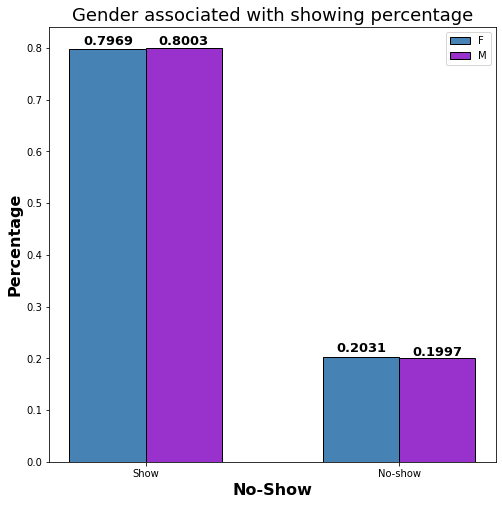

In [29]:
bar('Gender')

<font size = "3">*Males and females are nearly in percentages in showing up at their appointments and not showing too.*</font>

### Is scholarship associated with No-show?

Scholarship         0         1
No_show                        
No           0.801926  0.762637
Yes          0.198074  0.237363


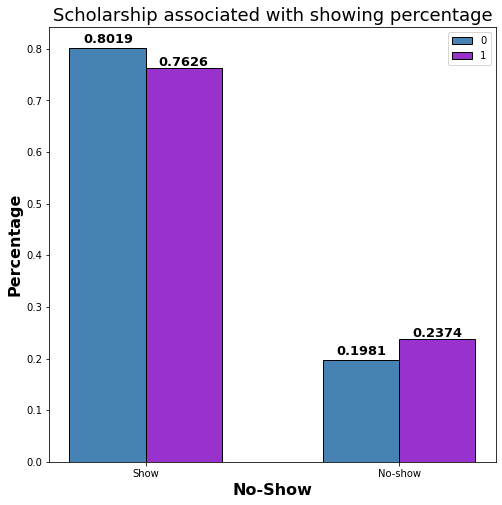

In [30]:
bar('Scholarship')

<font size = "3">*Patients without a scholarship show up at their appointments more than those who're having a scholarship.*</font>

### Is hipertension associated with No-show?

Hipertension         0        1
No_show                        
No            0.790961  0.82698
Yes           0.209039  0.17302


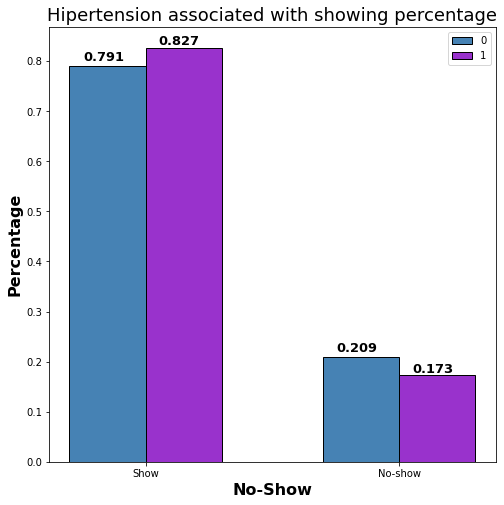

In [31]:
bar('Hipertension')

<font size = "3">*It appears here that patients with hipertension are more likely to show up at their appointments.*</font>

### Is diabetes associated with No-show?

Diabetes        0         1
No_show                    
No        0.79637  0.819967
Yes       0.20363  0.180033


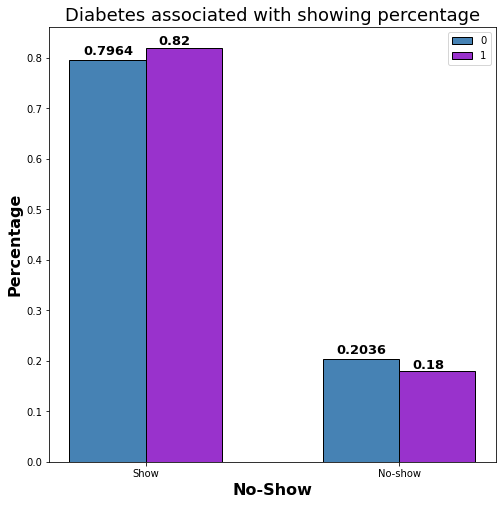

In [32]:
bar('Diabetes')

<font size = "3">*Patients who have diabetes show up at their appointments more than those who don't have.*</font>

### Is alcoholism associated with No-show?

Alcoholism         0         1
No_show                       
No          0.798052  0.798512
Yes         0.201948  0.201488


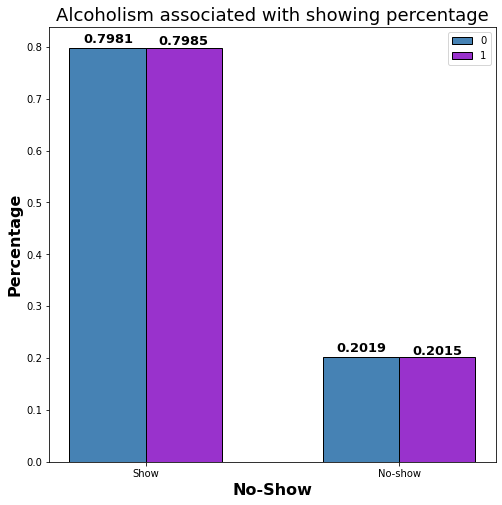

In [33]:
bar('Alcoholism')

<font size = "3">*It is shown that patients who take acohols are apporixmately the same as patients who don't take in showing up at the appointments.*</font>

### Is SMS-recieved associated with No-show?

SMS_received         0         1
No_show                         
No            0.832965  0.724255
Yes           0.167035  0.275745


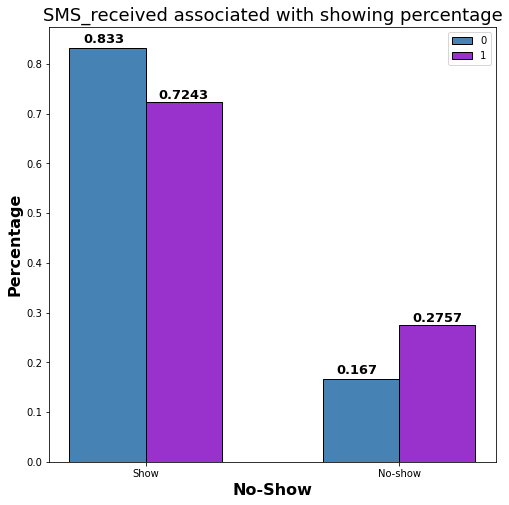

In [34]:
bar('SMS_received')

<font size = "3">*Here, patients who didn't receive a SMS message are more likely to appear in their appointments than others who didn't receive.*</font>

### Is age associated with No-show?

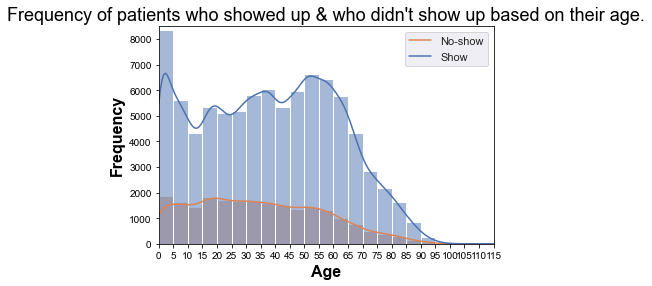

In [35]:
# Drawing histogram for the Age column with the show|no_show feature.
fig, ax = plt.subplots()
sns.set(rc={'figure.figsize':(15, 10)})
sns.histplot(data, x = 'Age', hue = 'No_show', bins = 23, kde = True)
ax.set_xlim(1,31)
ax.set_ylim(0, 8500)
ax.set_xticks(range(0, 120, 5))
plt.title("Frequency of patients who showed up & who didn't show up based on their age.", fontsize = 18)
plt.xlabel('Age', fontsize = 16, weight = "bold")
plt.ylabel('Frequency', fontsize = 16, weight = "bold")
plt.legend(["No-show", "Show"])
plt.show()

<font size = "3">*We can see that ages below `5 years`, between `35 & 40 years`, above `45 years` and below `60 years` have the most show up at their appointments among the dataset.*</font>

<a id='conclusions'></a>
## Conclusions

- <font size = "3">It is concluded that males and females are nearly in percentages in showing up at their appointments and not showing too.</font>


- <font size = "3">The majority of people had shown up at their appointments more than those who didn't.</font>


- <font size = "3">Patients without a scholarship show up at their appointments more than those who're having a scholarship.</font>


- <font size = "3">Patients with hipertension are more likely to show up at their appointments.</font>


- <font size = "3">Patients who have diabetes show up at their appointments more than those who don't have.</font>


- <font size = "3">It is concluded that patients who take acohols are apporixmately the same as patients who don't take in showing up at the appointments.</font>


- <font size = "3">Patients who didn't receive a SMS message are more likely to appear in their appointments than others who didn't receive.</font>


- <font size = "3">Patients with ages *below 5 years*, *between 35 & 40 years*, *above 45 years and below 60 years* have the most show up at their appointments among the dataset.</font>


<font size = "2">*Further investigation can be done to find some more statistics.*</font>

### Limitations

- <font size = "3">There was found a row that have an age of `-1`.</font>


- <font size = "3">This sample was of limited size, a larger one would get more accurate results.</font>


- <font size = "3">Knowing the neighbourhood of the patient would make this analysis more efficient, as it will play an important role with the relationship of the neighbourhood of the hospital.</font>